In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

from modules.linear import *
from modules.loss import *
from modules.activation import *
from modules.sequential import *
from tests.test_linear import *
from tests.test_activation import *


TestLinear().test_gradient(atol=1e-3, n_iter=25)
TestActivation().test_gradient_tanh(atol =1e-5, n_iter=25)
TestActivation().test_gradient_sigmoid(atol =1e-5, n_iter=25)


100%|██████████| 25/25 [00:00<00:00, 708.63it/s]


## Test on Iris dataset (3 classes) with Tanh

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2697.67it/s]


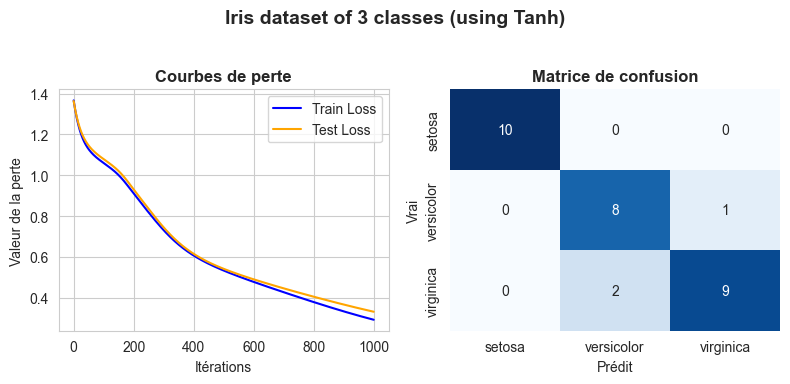


Rapport de classification :

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.80      0.89      0.84         9
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [15]:
X = sns.load_dataset("iris").drop(columns=["species"]).values
y = sns.load_dataset("iris")["species"].values
y = np.array([0 if i == 'setosa' else 1 if i == 'versicolor' else 2 for i in y])
y = np.eye(len(set(y)))[y]
y = y.reshape(-1, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([Linear(X_train.shape[1], 10),TanH(),Linear(10, 4), TanH(), Linear(4, 3)])
multi_class(X_train, y_train,X_test, y_test, model, n_iter=1000, eps=1e-2, classes_names=['setosa', 'versicolor', 'virginica'], titre='Iris dataset of 3 classes (using Tanh)', model_name='models/model_multi_classe_iris.pkl', loss_name='models/loss_multi_classe_iris.csv')


## Fashion MNIST Test (10 classes) using Tanh

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train = X_train / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(56000, 784)

(56000, 10)

(14000, 784)

(14000, 10)

100%|██████████| 100/100 [10:35<00:00,  6.36s/it]


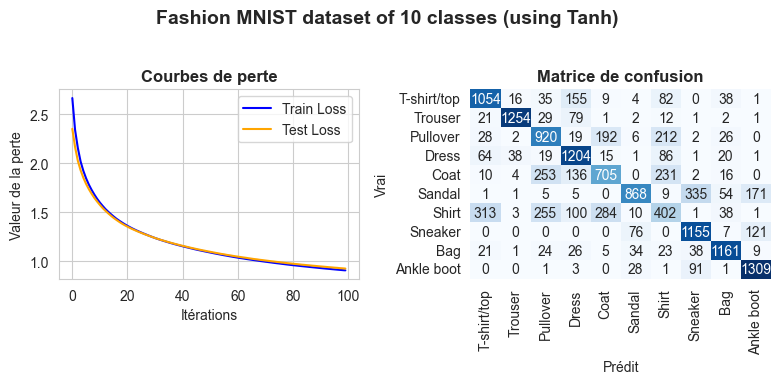


Rapport de classification :

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.76      0.73      1394
     Trouser       0.95      0.89      0.92      1402
    Pullover       0.60      0.65      0.62      1407
       Dress       0.70      0.83      0.76      1449
        Coat       0.58      0.52      0.55      1357
      Sandal       0.84      0.60      0.70      1449
       Shirt       0.38      0.29      0.33      1407
     Sneaker       0.71      0.85      0.77      1359
         Bag       0.85      0.87      0.86      1342
  Ankle boot       0.81      0.91      0.86      1434

    accuracy                           0.72     14000
   macro avg       0.71      0.72      0.71     14000
weighted avg       0.71      0.72      0.71     14000



In [4]:
model = Sequential([Linear(X_train.shape[1], 176),TanH(),Linear(176, 42), TanH(), Linear(42, 10)])
multi_class(X_train, y_train,X_test, y_test, model, n_iter=100, eps=1e-2, classes_names=classes_names_fashion_mnist, titre='Fashion MNIST dataset of 10 classes (using Tanh)', model_name="models/multi_classes_fashin_mnist1.pkl", loss_name="models/loss_multi_classes_fashin_mnist1.csv")


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [08:16<00:00,  4.96s/it]


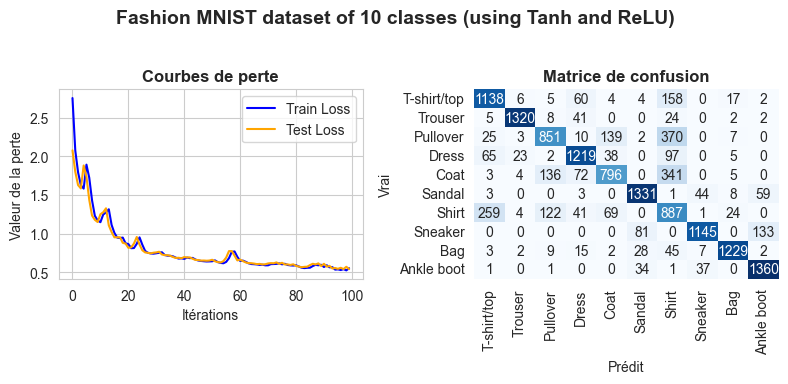


Rapport de classification :

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.82      0.79      1394
     Trouser       0.97      0.94      0.96      1402
    Pullover       0.75      0.60      0.67      1407
       Dress       0.83      0.84      0.84      1449
        Coat       0.76      0.59      0.66      1357
      Sandal       0.90      0.92      0.91      1449
       Shirt       0.46      0.63      0.53      1407
     Sneaker       0.93      0.84      0.88      1359
         Bag       0.95      0.92      0.93      1342
  Ankle boot       0.87      0.95      0.91      1434

    accuracy                           0.81     14000
   macro avg       0.82      0.80      0.81     14000
weighted avg       0.82      0.81      0.81     14000



In [5]:
model = Sequential([Linear(X_train.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10)])
multi_class(X_train, y_train,X_test, y_test, model, n_iter=100, eps=1e-1, classes_names=classes_names_fashion_mnist, titre='Fashion MNIST dataset of 10 classes (using Tanh and ReLU)', model_name="models/multi_classes_fashin_mnist2.pkl", loss_name="models/loss_multi_classes_fashin_mnist2.csv")


## Kuzushiji MNIST (10 classes) with Relu

In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Kuzushiji-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train = X_train / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_kuzushiji_mnist = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(56000, 784)

(56000, 10)

(14000, 784)

(14000, 10)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [09:38<00:00,  5.79s/it]


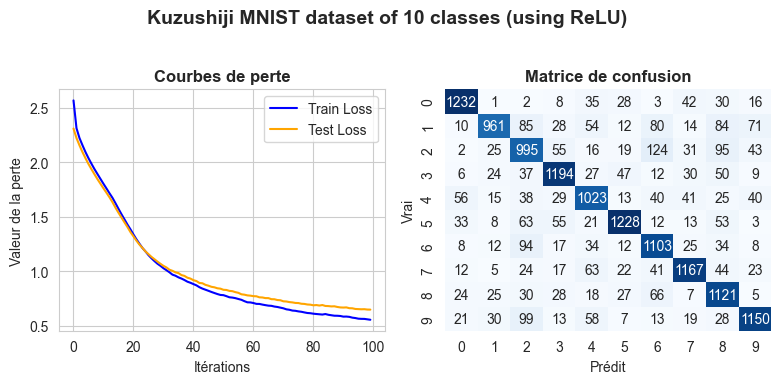


Rapport de classification :

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1397
           1       0.87      0.69      0.77      1399
           2       0.68      0.71      0.69      1405
           3       0.83      0.83      0.83      1436
           4       0.76      0.78      0.77      1320
           5       0.87      0.82      0.85      1489
           6       0.74      0.82      0.78      1347
           7       0.84      0.82      0.83      1418
           8       0.72      0.83      0.77      1351
           9       0.84      0.80      0.82      1438

    accuracy                           0.80     14000
   macro avg       0.80      0.80      0.80     14000
weighted avg       0.80      0.80      0.80     14000



In [17]:

model = Sequential([Linear(X_train.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10), ReLU()])
multi_class(X_train, y_train,X_test, y_test, model, n_iter=100, eps=1e-1, classes_names=classes_names_kuzushiji_mnist, titre='Kuzushiji MNIST dataset of 10 classes (using ReLU)', model_name="models/multi_classes_kuzushiji_mnist1.pkl", loss_name="models/loss_multi_classes_kuzushiji_mnist1.csv")
